In this exercise, we will implement an anomaly detection algorithm to detect
anomalous behavior in server computers. The features measure the through-
put (mb/s) and latency (ms) of response of each server. While our servers
were operating, we collected m = 307 examples of how they were behaving,
and thus have an unlabeled dataset {x (1) , . . . , x (m) }. We suspect that the
vast majority of these examples are “normal” (non-anomalous) examples of
the servers operating normally, but there might also be some examples of
servers acting anomalously within this dataset

We will use a Gaussian model to detect anomalous examples in our
dataset. We will first start on a 2D dataset that will allow us to visualize
what the algorithm is doing. On that dataset we will fit a Gaussian dis-
tribution and then find values that have very low probability and hence can
be considered anomalies. After that, we will apply the anomaly detection
algorithm to a larger dataset with many dimensions

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=loadmat('data/ex8data1.mat')

In [3]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 15:37:10 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[13.04681517, 14.74115241],
        [13.40852019, 13.7632696 ],
        [14.19591481, 15.85318113],
        [14.91470077, 16.17425987],
        [13.57669961, 14.04284944],
        [13.92240251, 13.40646894],
        [12.82213164, 14.22318782],
        [15.67636615, 15.89169137],
        [16.16287532, 16.20299807],
        [12.66645095, 14.89908374],
        [13.98454962, 12.95800822],
        [14.06146043, 14.54908874],
        [13.38988671, 15.56202142],
        [13.39350475, 15.62698794],
        [13.97900926, 13.28061494],
        [14.16791259, 14.46583829],
        [13.96176145, 14.75182421],
        [14.45899735, 15.07018563],
        [14.58476372, 15.82743424],
        [12.07427074, 13.0671109 ],
        [13.5491294 , 15.53827677],
        [13.98625042, 14.78776304],
        [14.96991942, 16.51830493],
        [14.25576597, 15.294

In [4]:
X=data['X']

In [5]:
Xval=data['Xval']

In [6]:
yval=data['yval']

In [7]:
X.shape

(307, 2)

In [8]:
Xval.shape

(307, 2)

In [9]:
yval.shape

(307, 1)

# Visualize The Data

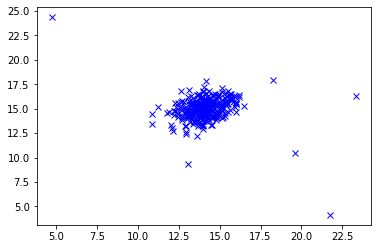

In [10]:
plt.plot(X[:,0],X[:,1],'bx')

# Gaussian distribution

To perform anomaly detection, we will first need to fit a model to the data’s
distribution.Given a training set {x (1) , ..., x (m) } (where x (i) ∈ R n ), you want to esti-
mate the Gaussian distribution for each of the features 


In [11]:
def gaussian_parameters(X):
    mu=np.mean(X,axis=0)
    variance=(np.std(X,axis=0))**2
    return mu,variance

In [12]:
def gaussian_probability(x,mu,variance):
    p=(1/((2*np.pi*variance)**(1/2)))*np.exp(-((x-mu)**2)/(2*variance))
    return p

In [13]:
mu,variance=gaussian_parameters(X)
    

In [14]:
mu

array([14.11222578, 14.99771051])

In [15]:
variance

array([1.83263141, 1.70974533])

# Selecting the threshold, ε

Now that you have estimated the Gaussian parameters, you can investigate
which examples have a very high probability given this distribution and which
examples have a very low probability. The low probability examples are
more likely to be the anomalies in our dataset. One way to determine which
examples are anomalies is to select a threshold based on a cross validation
set. In this part of the exercise, you will implement an algorithm to select
the threshold ε using the F 1 score on a cross validation set.

In [16]:
def calculate_f1(y,y_pred):
    y=y.reshape((len(y)))
    p=np.sum(y[y==y_pred])/(np.sum(y[y==y_pred]) + np.sum(y[y!=y_pred]))
    r=np.sum(y[y==y_pred])/(np.sum(y[y==y_pred]) + len(y[y!=y_pred]) - np.sum(y[y!=y_pred]))
    
    f1=2*p*r/(p+r)
    return f1

In [17]:
epsilon_set=np.linspace(0.00001,0.00009,20)

In [18]:
def model_predictions(X,epsilon,mu,variance):
    p=np.array([1 for i in range(len(X))]).reshape((len(X)))
    for i in range(len(X[0])):
        p=p*gaussian_probability(X[:,i],mu[i],variance[i])
    
    y_pred=np.array([0 for i in range(len(X))]).reshape((len(X)))
    y_pred[p<epsilon]=1
    
    return y_pred
    

In [19]:
max_f1=-64774

In [20]:
for eps in epsilon_set:
    y_pred=model_predictions(Xval,eps,mu,variance)
    f1=calculate_f1(yval,y_pred)
    if f1>max_f1:
        max_f1=f1
        correct_eps=eps
    print(f1)


0.7142857142857143
0.8
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001
0.8750000000000001


In [21]:
correct_eps

1.842105263157895e-05

In [22]:
y_pred=model_predictions(Xval,0.0000899,mu,variance)

In [23]:
np.sum(y_pred)

7

In [24]:
np.sum(yval)

9

# Plotting Anomaly classification

In [33]:
Xval_non_anomalous=Xval[y_pred==0]

In [35]:
Xval_non_anomalous.shape

(300, 2)

In [36]:
Xval_anomalous=Xval[y_pred==1]

In [37]:
Xval_anomalous.shape

(7, 2)

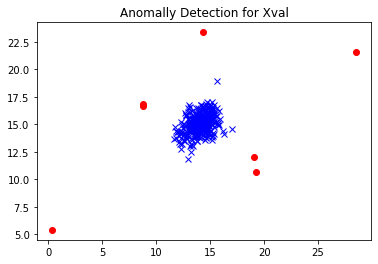

In [41]:
plt.plot(Xval_non_anomalous[:,0],Xval_non_anomalous[:,1],'bx')
plt.plot(Xval_anomalous[:,0],Xval_anomalous[:,1],'ro')
plt.title("Anomally Detection for Xval");

# Predicting Anomalies for X

In [42]:
y=model_predictions(X,correct_eps,mu,variance)

In [43]:
np.sum(y)

5

In [44]:
X_non_anomalous=X[y==0]

In [45]:
X_non_anomalous.shape

(302, 2)

In [46]:
X_anomalous=X[y==1]

In [47]:
X_anomalous.shape

(5, 2)

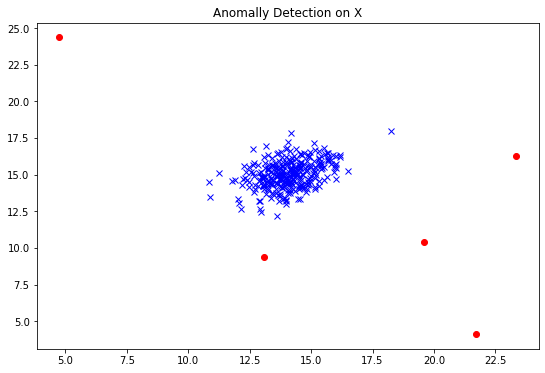

In [51]:
plt.figure(figsize=(9,6))
plt.plot(X_non_anomalous[:,0],X_non_anomalous[:,1],'bx')
plt.plot(X_anomalous[:,0],X_anomalous[:,1],'ro')
plt.title("Anomally Detection on X");

# Thank You